In [11]:
import os
!pip install pandas
!pip install matplotlib

In [24]:
import pandas as pd
import matplotlib
import sklearn
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn import neighbors
from sklearn import tree
from sklearn import naive_bayes
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Importing the dataset (Smartphone-Based Recognition of Human Activities and Postural Transitions)

In [13]:
with open('resources/HAPT Data Set/features.txt', 'r') as f:
    names = f.readlines()
columns_names = []
for name in names: # removes " \n" at the end of the column's name
    name = name.strip()
    columns_names.append(name)


## Cleaning the columns' names

When I tried to add the columns_name array as a parameter of the X_train DataFrame, an error occurred. "ValueError: Duplicate names are not allowed." So I made a for loop that would fill a "pairs" array with the columns' names that appear more than once, to know which column's name needs to be modified.

In [14]:
names_array = []
pairs = []

for name in columns_names:
    if name not in names_array:
        names_array.append(name)
    elif name not in pairs:
        pairs.append(name)
    else:
        pass

def change_end(end_of_name, keep):
    i = 2
    name_before = ''
    beginning_of_name = ''
    for j in range(len(columns_names)):
        if columns_names[j].endswith(end_of_name):
            beginning_of_name = columns_names[j].split("-")[0]
            if beginning_of_name == name_before:
                columns_names[j] = columns_names[j].replace(end_of_name, keep + str(i))
                i += 1
                name_before = beginning_of_name
            else:
                name_before = beginning_of_name
                i = 2
    
def change_end_bis(entire_name):
    i = 1
    while i < 4:
        for j in range(len(columns_names)):
            if columns_names[j] == entire_name:
                columns_names[j] = columns_names[j].replace(columns_names[j][-1], str(i))
                i += 1

change_end('ropy-1', 'ropy-')
change_end_bis('fBodyAcc-Skewness-1')
change_end_bis('fBodyAcc-Kurtosis-1')
change_end_bis('fBodyAccJerk-Skewness-1')
change_end_bis('fBodyAccJerk-Kurtosis-1')
change_end_bis('fBodyGyro-Skewness-1')
change_end_bis('fBodyGyro-Kurtosis-1')

## Importing the dataset (the end)

In [15]:
X_train = pd.read_table("resources/HAPT Data Set/Train/X_train.txt", delimiter=" ", names=columns_names)
Y_train = pd.read_table("resources/HAPT Data Set/Train/y_train.txt", names=['Posture'])

X_test = pd.read_table("resources/HAPT Data Set/Test/X_test.txt", delimiter=" ", names=columns_names)
Y_test = pd.read_table("resources/HAPT Data Set/Test/y_test.txt", names=['Posture'])
# train_df = pd.read_table("resources/HAPT Data Set/Train/X_train.txt", delimiter=" ")
# train_df.columns = [columns_names]
# train_df["Posture"] = pd.read_table("resources/HAPT Data Set/Train/y_train.txt")


## Looking at the data

In [16]:
print("Head of X_train:\n{}".format(X_train.head())) # shows the first 5 rows of the DataFrame
print("Shape of X_train: {}".format(X_train.shape)) # gives the dimensions of the DataFrame
print("Description of X_train:\n{}".format(X_train.describe())) # gives a statistical description of the DataFrame
print("Null values are contained in the DataFrame? {}".format(X_train.isnull().values.any())) # checks if the DataFrame contains null values.

Head of X_train:
   tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
0         0.043580        -0.005970        -0.035054       -0.995381   
1         0.039480        -0.002131        -0.029067       -0.998348   
2         0.039978        -0.005153        -0.022651       -0.995482   
3         0.039785        -0.011809        -0.028916       -0.996194   
4         0.038758        -0.002289        -0.023863       -0.998241   

   tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  \
0       -0.988366       -0.937382       -0.995007       -0.988816   
1       -0.982945       -0.971273       -0.998702       -0.983315   
2       -0.977314       -0.984760       -0.996415       -0.975835   
3       -0.988569       -0.993256       -0.996994       -0.988526   
4       -0.986774       -0.993115       -0.998216       -0.986479   

   tBodyAcc-Mad-3  tBodyAcc-Max-1  ...  fBodyGyroJerkMag-MeanFreq-1  \
0       -0.953325       -0.794796  ...                    -0.012

# Data visualisation

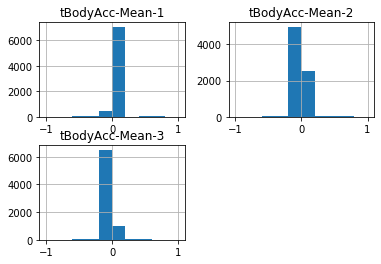

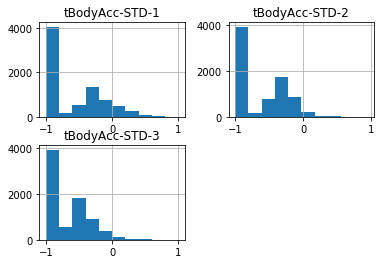

In [17]:
X_train.loc[:, ['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3']].hist()
X_train.loc[:, ['tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3']].hist()
#pd.plotting.scatter_matrix(X_train)
matplotlib.pyplot.show()

# Models

Here, we are working on the classification of the users' postures.

In [26]:
# models = [('LR', linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')), 
#           ('LDA', discriminant_analysis.LinearDiscriminantAnalysis()), 
#           ('KNN', neighbors.KNeighborsClassifier()), 
#           ('CART', tree.DecisionTreeClassifier()), 
#           ('NB', naive_bayes.GaussianNB()), 
#           ('SVM', svm.SVC(gamma='auto'))]
clf = svm.SVC(gamma=0.001, C=100.) # clf = classifier
print(Y_train.head())
clf.fit(X_train, Y_train)
Y_svc_pred = clf.predict(X_test)
print("Accuracy score for SVC: {}".format(accuracy_score(Y_test, Y_svc_pred)))

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_knc_pred = knn.predict(X_test)
print("Accuracy score for KNeighborsClassifier: {}".format(accuracy_score(Y_test, Y_knc_pred)))

   Posture
0        5
1        5
2        5
3        5
4        5
Accuracy score for SVC: 0.9535104364326376
Accuracy score for KNeighborsClassifier: 0.8848829854522454


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## Evaluate the models

In [19]:
results = []
names = []

for name, model in models:
    kfold = sklearn.model_selection.StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = sklearn.model_selection.cross_val_score(model, X_train[:50], Y_train[:50], cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NameError: name 'models' is not defined